<a href="https://colab.research.google.com/github/ShebaAlam/AIMLMonth2023/blob/main/major_project_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing essential libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


**Importing and understanding our dataset**

In [ ]:
dataset = pd.read_csv("heart.csv")

Verifying it as a 'dataframe' object in pandas

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

Shape of dataset

In [ ]:
dataset.shape

(303, 14)

Printing out a few columns

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1


Description

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Let's understand our columns better:

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analysing the 'target' variable

In [ ]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([1, 0])

Clearly, this is a classification problem, with the target variable having values '0' and '1'

**Exploratory Data Analysis (EDA)**

First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


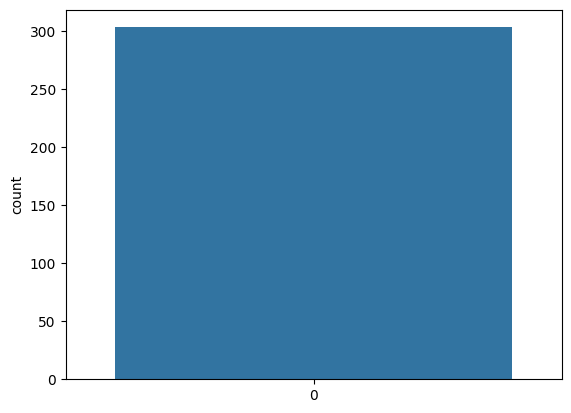

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patients with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patients with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


**We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features**

Analysing the 'Sex' feature

In [ ]:
dataset["sex"].unique()

array([1, 0])

We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

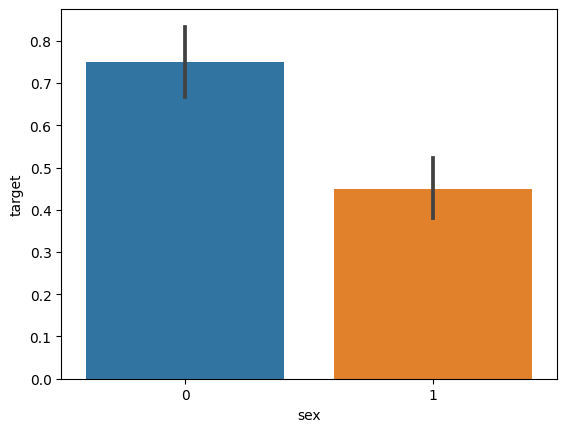

In [ ]:
sns.barplot(x=dataset["sex"],y=y)

We notice, that females are more likely to have heart problems than males

In [ ]:
dataset["cp"].unique()

array([3, 2, 1, 0])

As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

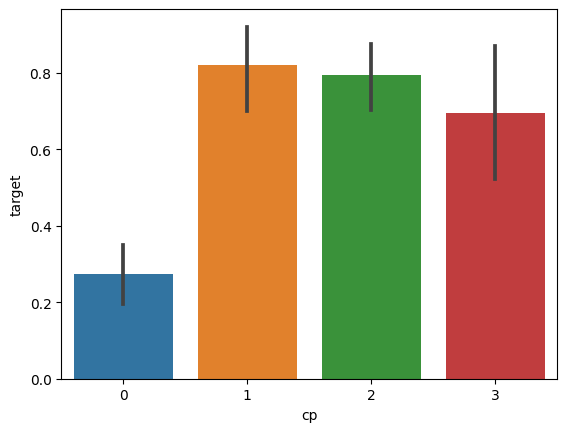

In [ ]:
sns.barplot(x=dataset["cp"],y=y)

We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

**Analysing the FBS feature**

In [ ]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

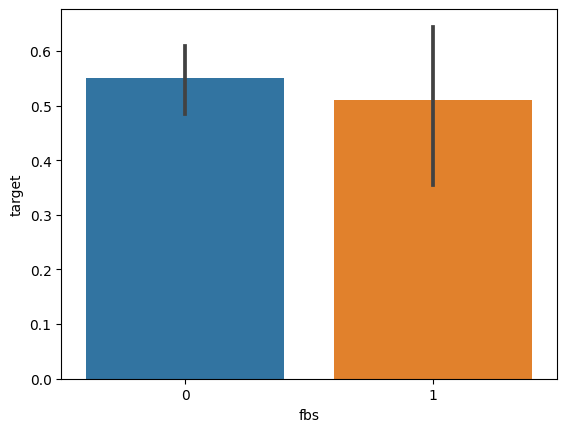

In [ ]:
sns.barplot(x=dataset["fbs"],y=y)

Nothing extraordinary here

**Analysing the restecg feature**

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

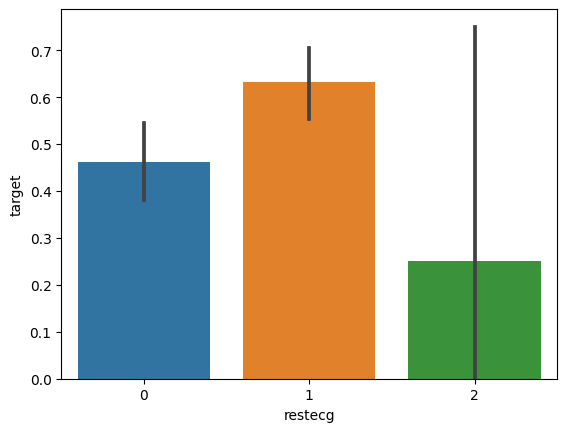

In [ ]:
sns.barplot(x=dataset["restecg"],y=y)

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

**Analysing the 'exang' feature**

In [ ]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

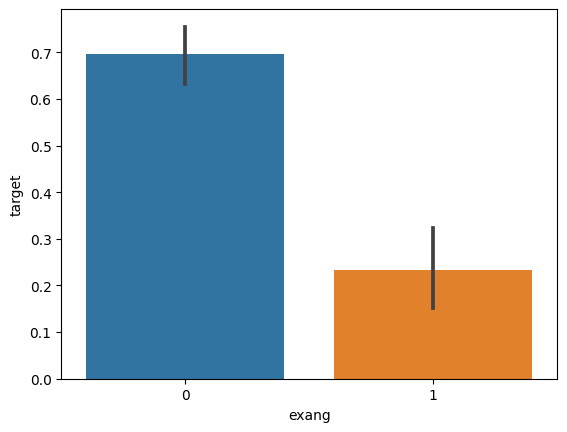

In [ ]:
sns.barplot(x=dataset["exang"],y=y)

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

**Analysing the Slope feature**

In [ ]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

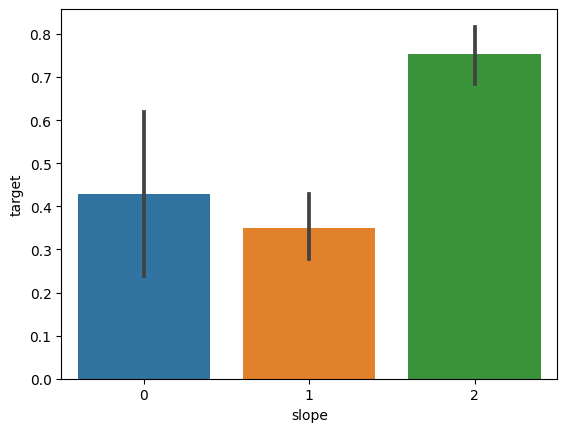

In [ ]:
sns.barplot(x=dataset["slope"],y=y)

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

**Analysing the 'ca' feature**

In [ ]:
#number of major vessels (0-3) colored by flourosopy

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

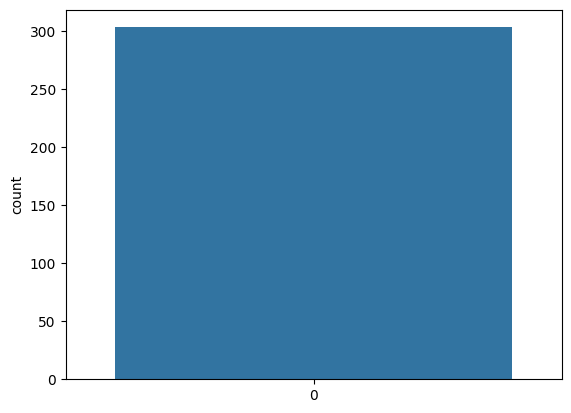

In [ ]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

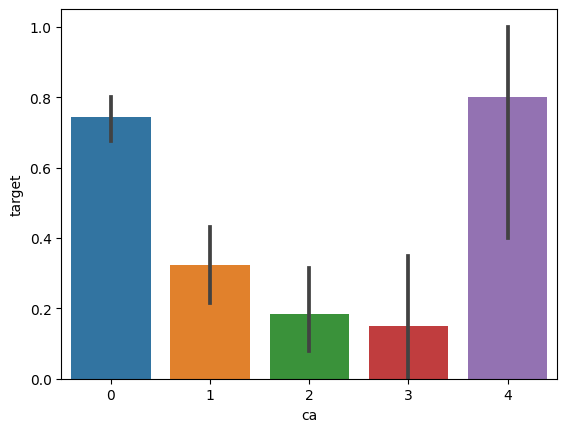

In [ ]:
sns.barplot(x=dataset["ca"],y=y)

ca=4 has astonishingly large number of heart patients

In [ ]:
### Analysing the 'thal' feature

In [ ]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

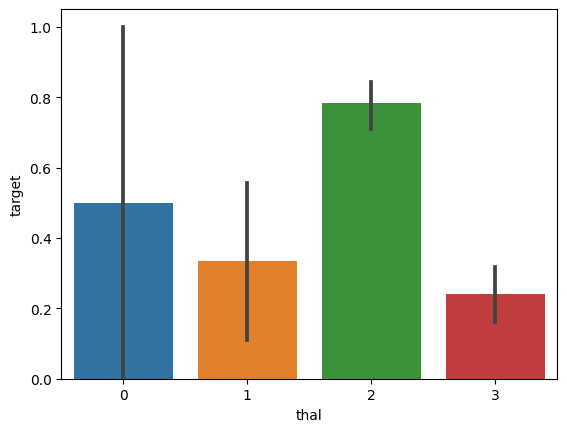

In [ ]:
sns.barplot(x=dataset["thal"],y=y)

<Axes: xlabel='thal', ylabel='Density'>

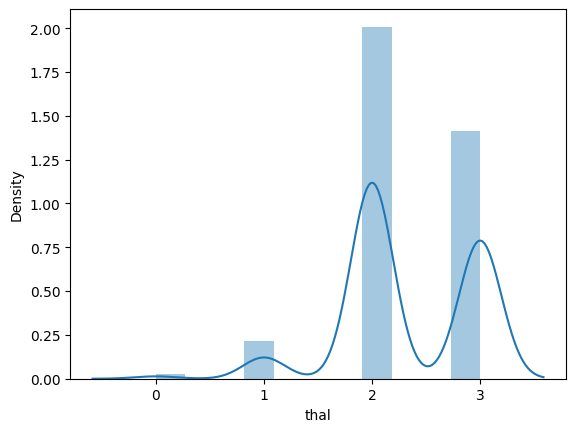

In [ ]:
sns.distplot(dataset["thal"])

**Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

**Model Fitting**

In [ ]:
from sklearn.metrics import accuracy_score

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


The accuracy score achieved using Logistic Regression is: 85.25 %

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:

Y_pred_nb.shape

(61,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 77.05 %


The accuracy score achieved using Naive Bayes is: 77.05 %

**K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(61,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.13 %


The accuracy score achieved using KNN is: 72.13 %

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,Y_train)




DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.predict(X_train)


array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
Y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

In [ ]:
model.predict(X_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
Y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

In [ ]:
model.score(X_train,Y_train)

1.0

In [ ]:
model.score(X_test,Y_test)

0.7868852459016393

In [ ]:
model.score(X_test,Y_test)*100

78.68852459016394

The accuracy score achieved using Decision Tree is: 78.68 %

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

(61,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


The accuracy score achieved using Decision Tree is: 81.97 %

[Text(0.4203125, 0.9444444444444444, 'cp <= 0.5\nentropy = 0.995\nsamples = 242\nvalue = [111, 131]'),
 Text(0.24375, 0.8333333333333334, 'ca <= 0.5\nentropy = 0.858\nsamples = 117\nvalue = [84, 33]'),
 Text(0.1625, 0.7222222222222222, 'thal <= 2.5\nentropy = 0.991\nsamples = 54\nvalue = [24, 30]'),
 Text(0.075, 0.6111111111111112, 'thalach <= 119.5\nentropy = 0.799\nsamples = 33\nvalue = [8, 25]'),
 Text(0.05, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1, 0.5, 'exang <= 0.5\nentropy = 0.709\nsamples = 31\nvalue = [6, 25]'),
 Text(0.05, 0.3888888888888889, 'chol <= 316.5\nentropy = 0.297\nsamples = 19\nvalue = [1, 18]'),
 Text(0.025, 0.2777777777777778, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.075, 0.2777777777777778, 'chol <= 362.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15, 0.3888

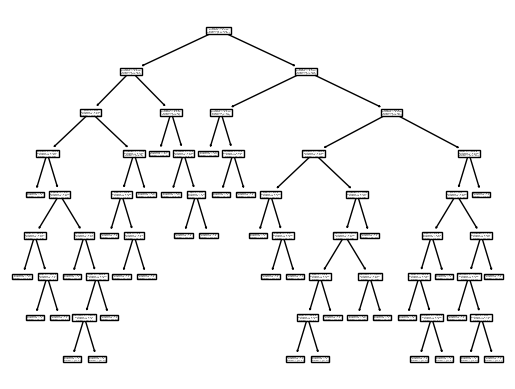

In [ ]:
from sklearn import tree
tree.plot_tree(model,feature_names=X_train.columns)

**Gradient Boosting Decision Tree**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier(n_estimators=100)
gbdt.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
gbdt.score(X_train,Y_train)

1.0

In [ ]:
gbdt.score(X_test,Y_test)*100

80.32786885245902

The accuracy score achieved is: 80.32 %

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


The accuracy score achieved using Random Forest is: 95.08 %

**Neural Network**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model_nn=Sequential()
model_nn.add(Dense(10,activation='relu',input_shape=(13,)))
model_nn.add(Dense(5,activation='relu'))

model_nn.add(Dense(1,activation='sigmoid'))

model_nn.summary()
model_nn.compile(loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                140       
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_nn.fit(X_train,Y_train,epochs=150)

Epoch 1/150
8/8 [==============================] - 0s 6ms/step - loss: 0.3600 - accuracy: 0.8471
Epoch 2/150
8/8 [==============================] - 0s 7ms/step - loss: 0.3762 - accuracy: 0.8388
Epoch 3/150
8/8 [==============================] - 0s 6ms/step - loss: 0.3675 - accuracy: 0.8223
Epoch 4/150
8/8 [==============================] - 0s 6ms/step - loss: 0.3689 - accuracy: 0.8140
Epoch 5/150
8/8 [==============================] - 0s 7ms/step - loss: 0.3657 - accuracy: 0.8471
Epoch 6/150
8/8 [==============================] - 0s 7ms/step - loss: 0.3701 - accuracy: 0.8306
Epoch 7/150
8/8 [==============================] - 0s 5ms/step - loss: 0.3686 - accuracy: 0.8347
Epoch 8/150
8/8 [==============================] - 0s 6ms/step - loss: 0.3627 - accuracy: 0.8430
Epoch 9/150
8/8 [==============================] - 0s 6ms/step - loss: 0.3460 - accuracy: 0.8471
Epoch 10/150
8/8 [==============================] - 0s 5ms/step - loss: 0.3710 - accuracy: 0.8182
Epoch 11/150
8/8 [===========

In [ ]:
model_nn.evaluate(X_train,Y_train)

8/8 [==============================] - 0s 4ms/step - loss: 0.4249 - accuracy: 0.7893


[0.42490094900131226, 0.78925621509552]

In [ ]:
model_nn.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.5420 - accuracy: 0.8033


[0.5420130491256714, 0.8032786846160889]

In [ ]:
Y_pred_nn = model_nn.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 80.33 %


The accuracy score achieved using Neural Network is: 80.33 %

**Output final score**

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)